#### <a style="color:#ae0000" >$$Seblaoui Badreddine$$  $$2 DNI Groupe 2 $$        

# <center style="color:#021E55" >-- Compte Rendu TP2 Analyse Numérique --</center>

> ###  <p style="color:#4287f5" >Exercice 1

## <p style="color:#028A93">théoréme d'interpolation de lagrange :</p> 

<p>il existe p vérifiant</p>
   $$\left \{
   \begin{array}{r c l}
      p(x_0) \hspace{0.2cm}=\hspace{0.2cm} f(x_0)\hspace{0.2cm} ∀ \hspace{0.2cm}i\hspace{0.2cm}=\hspace{0.2cm}0,n \\
      deg(p) ≥ N
   \end{array}
   \right. $$

<p> ce polynome p s'appel le polynome dinterpolatin de lagrange , il est donne comme suit:</p>

$p(x) =\sum_{i=1}^N f(x_i) L_i(x) $. 

$L_i(x) = \prod_{k=0}^N \frac{x-x_k}{x_i-x_k} $.


>> ### <p style="color:#255;text-decoration: underline;">Enoncé: </p>


On considère le programme MATLAB suivant :
``` octave
function u=PR(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S); 
```

## 1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

>> ## <p style="color:#028A93"> Version PYTHON :</p> 

In [248]:
import numpy as np
def PR(x,y,c):
    S = y.copy()
    #S = y
    n = len(x) 
    for j in range(0, n):
        L = [c - a for a in x]
       # L = c-x; 
        for k in range(0,n) :
            if (k == j):
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        S[j] = S[j]*np.prod(L)
    return(np.sum(S))

In [249]:
X=[1,2,3,4]
Y=[-1,0,2,1]
for i in X:
    print(PR(X,Y,i))

-1.0
0.0
2.0
1.0


## 2) Que contient le vecteur  LL  après la fin de la boucle  kk .


In [250]:
x=[1,2,3,4]
y=[-1,0,2,1]
for c in X:
    S = y.copy()
    #S = y
    n = len(x) 
    for j in range(0, n):
        L = [c - a for a in x]
       # L = c-x; 
        for k in range(0,n) :
            if (k == j):
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        S[j] = S[j]*np.prod(L)
    print("a la fin de boucle k de  c = {} , le vecteur L est {} :".format(c,L))
#    return(np.sum(S))

a la fin de boucle k de  c = 1 , le vecteur L est [0.0, -0.5, -2.0, 1] :
a la fin de boucle k de  c = 2 , le vecteur L est [0.3333333333333333, 0.0, -1.0, 1] :
a la fin de boucle k de  c = 3 , le vecteur L est [0.6666666666666666, 0.5, 0.0, 1] :
a la fin de boucle k de  c = 4 , le vecteur L est [1.0, 1.0, 1.0, 1] :


## 3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

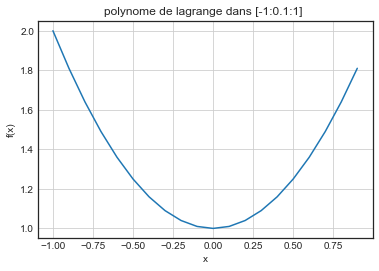

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
#T=np.linspace(-1,1,22)
T = np.arange(-1., 1., 0.1)
f=lambda x: 1/1+x**2
plt.title ("polynome de lagrange dans [-1:0.1:1] ");
plt.xlabel ("x");
plt.ylabel ("f(x)");
plt.grid(True)
plt.plot(T,f(T))

## 4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

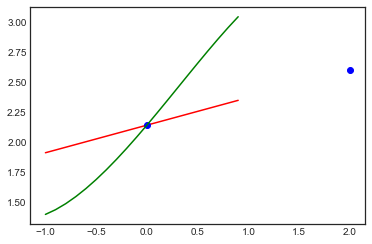

In [252]:
import math
x=[0,2]
#T=np.linspace(-1,1,22)
T = np.arange(-1., 1., 0.1)
f=lambda x: (math.pi)-(math.cos(x/2))+x*(math.sqrt(1-(x/2)**2))
#on utilise np.vctorize pour que la fonction accepte une liste comme parametre 
f2 = np.vectorize(f)
y = [f(a) for a in x]
pn= []
for u in range(0,len(T)):
    pn.append(PR(x,y,T[u]))
plt.plot(T,pn,'r',x,y,'bo',T,f2(T),'g')

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

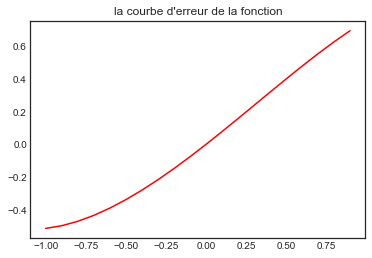

In [253]:
x=[0,2]
#T=np.linspace(-1,1,22)
T = np.arange(-1., 1., 0.1)
f=lambda x: (math.pi)-(math.cos(x/2))+x*(math.sqrt(1-(x/2)**2))
f2 = np.vectorize(f)
y = [f(a) for a in x]
plt.title("la courbe d'erreur de la fonction")
pn= []
for u in range(0,len(T)):
    pn.append(PR(x,y,T[u]))
plt.plot(T,f2(T)-pn,'r')

> ###  <p style="color:#4287f5" >Exercice 2 ( Phenomène de Runge )

>> ## <p style="color:#028A93"> Version PYTHON :</p> 

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

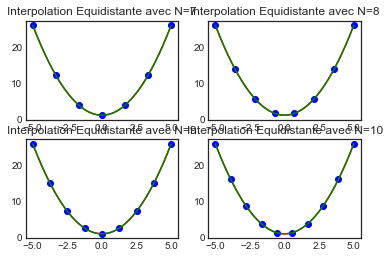

In [254]:
N=7
X=np.linspace(-5,5,N)
f=lambda x : 1/1+x**2
f2=np.vectorize(f)
Y= [f(a) for a in X]
p = np.polyfit(X, Y, N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f2(t),'r',X,Y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
####################################################
N=8
X=np.linspace(-5,5,N)
f=lambda x : 1/1+x**2
f2=np.vectorize(f)
Y= [f(a) for a in X]
p = np.polyfit(X, Y, N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f2(t),'r',X,Y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
####################################################
N=9
X=np.linspace(-5,5,N)
f=lambda x : 1/1+x**2
f2=np.vectorize(f)
Y= [f(a) for a in X]
p = np.polyfit(X, Y, N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f2(t),'r',X,Y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
####################################################
N=10
X=np.linspace(-5,5,N)
f=lambda x : 1/1+x**2
f2=np.vectorize(f)
Y= [f(a) for a in X]
p = np.polyfit(X, Y, N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f2(t),'r',X,Y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")



2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [1]:
def tcheb(a,b,n):
    v=[]
    for k in range(0,n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return(v)


In [4]:
v=tcheb(-5,5,11)
print(v)

NameError: name 'tcheb' is not defined

In [ ]:
N=10
f=lambda x: 1/1+x**2
Xt=tcheb(-5,5,N)
f2=np.vectorize(f)
Yt=f2(Xt)
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f2(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
##########################################
N=11
f=lambda x: 1/1+x**2
Xt=tcheb(-5,5,N)
f2=np.vectorize(f)
Yt=f2(Xt)
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
plt.plot(t,f2(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
##########################################
N=16
f=lambda x: 1/1+x**2
Xt=tcheb(-5,5,N)
f2=np.vectorize(f)
Yt=f2(Xt)
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,3)
plt.plot(t,f2(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
##########################################
N=17
f=lambda x: 1/1+x**2
Xt=tcheb(-5,5,N)
f2=np.vectorize(f)
Yt=f2(Xt)
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,4)
plt.plot(t,f2(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")
##########################################

> ###  <p style="color:#4287f5" >Exercice 3

### <p style="color:#e320c2" >Principe de la méthode Newton (ou de diff divisée) : </p>
   
   #### <p> théoreme </p> 
   
   <p> soit $$f:[a , b]\to \mathbb{R}$$ soient x_0 ,...,x_n des point 2 a 2 distinsts . Alors le polynome d'inerpolation associé a f aux noeuds$$ x_0 \to x_n$$ ets donné par :
    $$P_n(x) = f[x_0]+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)+..+f[x_0,x_1,.,x_n](x-x_0)(x-x_1)..(x-x_n)$$

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

>> ## <p style="color:#028A93"> Version PYTHON :</p> 

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [3]:
def intN(x,y):
    m=len(x)
    f=[]
    for k in range(2,m):
        f[k].append((y[k]-y[k-1])/(x[k]-x[1:m+1-k]))
    return(f)

In [4]:
x=[-1,0,2,5];
y=[6,1,3,66];
print(intN(x,y))

IndexError: list index out of range

In [5]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(np.size(t))
    for k in range(m-1,-1,1):
        p=p*(t-x[k])+y[k]
    return(p)

In [5]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
print(intNval(x,y,t))

NameError: name 'intNval' is not defined

## Calcul a la main

Daprés le calcule a la main le polynome de newton est le suivant :
$f(x) =1+\dfrac{82}{18}x+\dfrac{64}{18}x^2+\dfrac{28}{18}x^3 $


2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

In [7]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y);
f2=np.vectorize(f)
plt.plot(x,f2,'r',x,y,'ob')

IndexError: list index out of range

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [6]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
p=intNval(x,y,t);
p(1)

NameError: name 'intNval' is not defined